In [1]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

OpenCV version: 3.4.2


In [2]:
boat_path = os.path.join("data","boat")
he = HomographyEstimation(boat_path)

img1_path = boat_path+"/img1.pgm"
img2_path = boat_path+"/img2.pgm"

img1 = KeypointDetector(img1_path).gray
img2 = KeypointDetector(img2_path).gray

In [3]:
matches, query_kps, train_kps = match_features(img1_path, img2_path, "harris", "sift", asarray=False)

Keypoints count:  1020
Keypoints count:  997


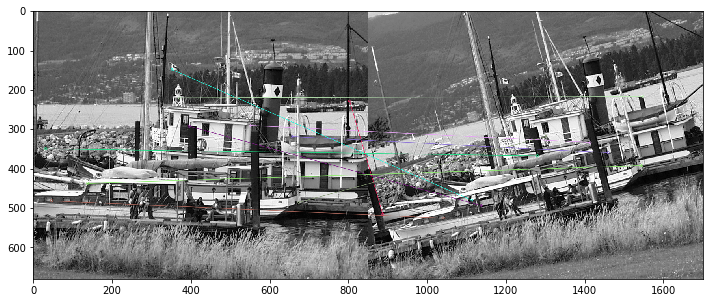

In [4]:
img3 = cv2.drawMatches(img1,query_kps,img2,train_kps,matches[:10], None,flags=2)
f, ax = plt.subplots(figsize=(12,7))
ax.imshow(img3)
plt.show()

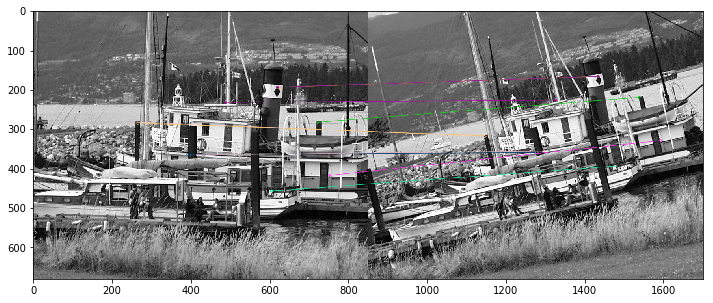

(<matplotlib.image.AxesImage at 0x7f0f8401ce80>, None)

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(12,7))

# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1 = orb.detect(img1)
kp2 = orb.detect(img2)

kp1, des1 = orb.compute(img1,kp1,None)
kp2, des2 = orb.compute(img2,kp2,None)

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
ax.imshow(img3),plt.show()

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

boat_path = os.path.join("data","boat")

img1 = boat_path+"/img1.pgm"
img2 = boat_path+"/img2.pgm"


img1 = KeypointDetector(img1).gray
img2 = KeypointDetector(img2).gray

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN_INDEX_KDTREE = 0
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks = 50)

# flann = cv2.FlannBasedMatcher(index_params, search_params)

# matches = flann.knnMatch(des1,des2,k=2)

bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
maxdist = max(matches, key=lambda x:x.distance).distance
# store all the good matches as per Lowe's ratio test.
good = []
for m in matches:
    if m.distance < 0.7*maxdist:
        good.append(m)

In [ ]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = estimate_homography_matrix(src_pts, dst_pts, iterations=50000)
#     M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
#     h,w = img1.shape
#     pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
#     dst = cv.perspectiveTransform(pts,M)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

In [8]:
H = parseH(he.Hs[0])
dst = cv.perspectiveTransform(src_pts,M)
ground_dst = cv.perspectiveTransform(src_pts,H)
calculate_precision_recall(ground_dst, dst)

(0.5954664341761116, 0.18064004231684738)

In [15]:
h,w = img1.shape

In [22]:
i1 = cv2.warpPerspective(img1, H, (h,w))
i2 = cv2.warpPerspective(img1, M, (h,w))

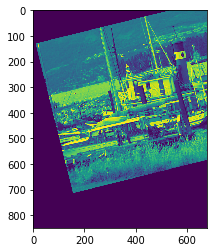

In [23]:
plt.imshow(i1)

plt.show()

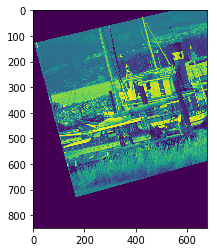

In [24]:
plt.imshow(i2)

plt.show()